<a href="https://colab.research.google.com/github/FarShid-Hosseinzadeh/AI-Homeworks/blob/main/MP3_Hosseinzadeh9821203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q4.1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1IPbQgkOCqQxsXEwQ_FtmoYC0WV3H4-2T

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1IPbQgkOCqQxsXEwQ_FtmoYC0WV3H4-2T
To: /content/covid.csv
100% 258/258 [00:00<00:00, 1.09MB/s]


In [ ]:
data = pd.read_csv('/content/covid.csv')
data.columns = ['fever', 'cough', 'breath', 'infected']
data

,fever,cough,breath,infected
0,No,No,No,No
1,Yes,Yes,Yes,Yes
2,Yes,Yes,No,No
3,Yes,No,Yes,Yes
4,Yes,Yes,Yes,Yes
5,No,Yes,No,No
6,Yes,No,Yes,Yes
7,Yes,No,Yes,Yes
8,No,Yes,Yes,Yes
9,Yes,Yes,No,Yes


In [ ]:
def entropy(labels):
    p = labels.value_counts() / len(labels)
    return -sum(p * np.log2(p))

In [ ]:
def information_gain(data, feature, target):
    # Entropy of parent
    entropy_parent = entropy(data[target])

    # Entropy of child
    entropy_child = 0
    for value in data[feature].unique():
        subset = data[data[feature] == value]
        wi = len(subset) / len(data)
        entropy_child += wi * entropy(subset[target])

    return entropy_parent - entropy_child

In [ ]:
[information_gain(data, feature, 'infected') for feature in data.iloc[:, :-1].columns]

[0.12808527889139443, 0.0391486719030707, 0.39603884492804464]

In [ ]:
class Node:

    def __init__(self, feature=None, label=None):
        self.feature = feature
        self.label = label
        self.children = {}

    def __repr__(self):
        if self.feature is not None:
            return f'DecisionNode(feature="{self.feature}", children={self.children})'
        else:
            return f'LeafNode(label="{self.label}")'

In [ ]:
def make_tree(data, target):
    # leaf node?
    if len(data[target].unique()) == 1:
        return Node(label=data[target].iloc[0])

    features = data.drop(target, axis=1).columns
    if len(features) == 0 or len(data) == 0:
        return Node(label=data[target].mode()[0])

    # calculate information gain
    gains = [information_gain(data, feature, target) for feature in features]

    # greedy search to find best feature
    max_gain_idx = np.argmax(gains)
    best_feature = features[max_gain_idx]

    # make a node
    node = Node(feature=best_feature)

    # loop over the best feature
    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value].drop(best_feature, axis=1)
        display(subset)

        node.children[value] = make_tree(subset, target)

    return node

In [ ]:
tree = make_tree(data, 'infected')
tree

,fever,cough,infected
0,No,No,No
2,Yes,Yes,No
5,No,Yes,No
9,Yes,Yes,Yes
10,No,Yes,No
13,Yes,Yes,No


,cough,infected
0,No,No
5,Yes,No
10,Yes,No


,cough,infected
2,Yes,No
9,Yes,Yes
13,Yes,No


,infected
2,No
9,Yes
13,No


,fever,cough,infected
1,Yes,Yes,Yes
3,Yes,No,Yes
4,Yes,Yes,Yes
6,Yes,No,Yes
7,Yes,No,Yes
8,No,Yes,Yes
11,No,Yes,Yes
12,No,Yes,No


,cough,infected
1,Yes,Yes
3,No,Yes
4,Yes,Yes
6,No,Yes
7,No,Yes


,cough,infected
8,Yes,Yes
11,Yes,Yes
12,Yes,No


,infected
8,Yes
11,Yes
12,No


DecisionNode(feature="breath", children={'No': DecisionNode(feature="fever", children={'No': LeafNode(label="No"), 'Yes': DecisionNode(feature="cough", children={'Yes': LeafNode(label="No")})}), 'Yes': DecisionNode(feature="fever", children={'Yes': LeafNode(label="Yes"), 'No': DecisionNode(feature="cough", children={'Yes': LeafNode(label="Yes")})})})

In [ ]:
from graphviz import Digraph, nohtml

g = Digraph('g', filename='decision-tree.gv', node_attr={'shape': 'record', 'height': '.1'})

def plot_tree(tree, g):
    root_node = tree.feature
    if root_node is None:
        return g
    g.node(root_node, nohtml(root_node))
    child_nodes = tree.children.keys()
    for i, child in enumerate(child_nodes):
        node = tree.children[child]
        name = node.feature if node.feature is not None else child+node.label
        label = node.feature if node.feature is not None else node.label
        g.node(name, nohtml(label))
        g.edge(root_node, name, label=child)
        plot_tree(node, g)
    return g

g = plot_tree(tree, g)
g.render('decision_tree', format='png', view=True)

'decision_tree.png'

# Q4.2

In [ ]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1OpfuHTn7TdXaic_ZCC3gdG_XV0OwPa0Q

Downloading...
From: https://drive.google.com/uc?id=1OpfuHTn7TdXaic_ZCC3gdG_XV0OwPa0Q
To: /content/drug200.csv
100% 5.83k/5.83k [00:00<00:00, 16.3MB/s]


In [ ]:
df = pd.read_csv('/content/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
y = df['Drug']
X = df.drop(columns=['Drug'])

In [ ]:
label_encoder = LabelEncoder()

print("Original 'Sex' values:", X['Sex'].unique())
X['Sex'] = label_encoder.fit_transform(X['Sex'])
print("Encoded 'Sex' values:", X['Sex'].unique())

print("Original 'BP' values:", X['BP'].unique())
X['BP'] = label_encoder.fit_transform(X['BP'])
print("Encoded 'BP' values:", X['BP'].unique())

print("Original 'Cholesterol' values:", X['Cholesterol'].unique())
X['Cholesterol'] = label_encoder.fit_transform(X['Cholesterol'])
print("Encoded 'Cholesterol' values:", X['Cholesterol'].unique())

Original 'Sex' values: ['F' 'M']
Encoded 'Sex' values: [0 1]
Original 'BP' values: ['HIGH' 'LOW' 'NORMAL']
Encoded 'BP' values: [0 1 2]
Original 'Cholesterol' values: ['HIGH' 'NORMAL']
Encoded 'Cholesterol' values: [0 1]


In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=4, random_state=3, ccp_alpha=0.1, criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.1, criterion='entropy', max_depth=4,
                       random_state=3)

[Text(0.625, 0.9, 'x[4] <= 14.829\nentropy = 1.969\nsamples = 200\nvalue = [23, 16, 16, 54, 91]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\nentropy = 1.788\nsamples = 109\nvalue = [23, 16, 16, 54, 0]'),
 Text(0.25, 0.5, 'x[0] <= 50.5\nentropy = 0.977\nsamples = 39\nvalue = [23, 16, 0, 0, 0]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 23\nvalue = [23, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 16\nvalue = [0, 16, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\nentropy = 0.776\nsamples = 70\nvalue = [0, 0, 16, 54, 0]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\nentropy = 0.998\nsamples = 34\nvalue = [0, 0, 16, 18, 0]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 16\nvalue = [0, 0, 16, 0, 0]'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 18\nvalue = [0, 0, 0, 18, 0]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 36\nvalue = [0, 0, 0, 36, 0]'),
 Text(0.75, 0.7, 'entropy = 0.0\nsamples = 91\nvalue = [0, 0, 0, 0, 91]')]

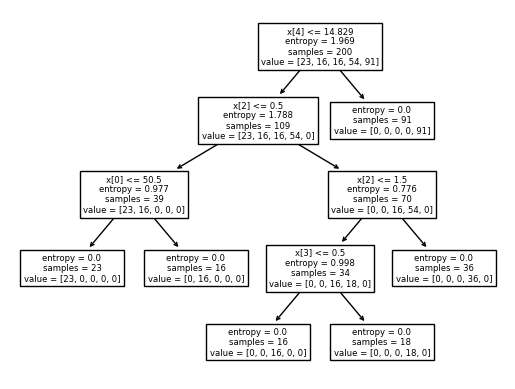

In [ ]:
tree.plot_tree(clf)